# Feature Shuffling For Feature Selection by `Mr. Harshit Dawar!`
* Internal Working of this Method:
    * First of all, it trains the model using the original dataset.
    * Shuffle the Value of any one feature, & then use the dataset as a prediction dataset, & then predicts using the model initially trained & the dataset obtained after shuffling the feature.
    * Record the Performance Drift.
    * Based on the selection metrics, threshold for the Feature Selection is set.
    * Based on the Performance Drift, Features are selected.

In [12]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the Dataset

data = pd.read_csv("../ds/Titanic.csv")

In [3]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.590495,1,0,-0.500240,S
1,1,1,female,0.643971,1,0,0.788947,C
2,1,3,female,-0.281878,0,0,-0.486650,S
3,1,1,female,0.412509,1,0,0.422861,S
4,0,3,male,0.412509,0,0,-0.484133,S


In [4]:
X = data.drop("Survived", axis = 1)
y = data.Survived

In [5]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.590495,1,0,-0.500240,S
1,1,female,0.643971,1,0,0.788947,C
2,3,female,-0.281878,0,0,-0.486650,S
3,1,female,0.412509,1,0,0.422861,S
4,3,male,0.412509,0,0,-0.484133,S
...,...,...,...,...,...,...,...
884,2,male,-0.204724,0,0,-0.384475,S
885,1,female,-0.821957,0,0,-0.042213,S
886,3,female,0.003524,1,2,-0.174084,S
887,1,male,-0.281878,0,0,-0.042213,C


In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [13]:
X.Embarked = LabelEncoder().fit_transform(X.Embarked)
X.Sex = LabelEncoder().fit_transform(X.Sex)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [15]:
x_train.shape, y_train.shape

((755, 7), (755,))

In [16]:
# Building the Feature Selector!

Feature_Selector = RandomForestClassifier(n_jobs = 2)
Feature_Selector.fit(x_train, y_train)

RandomForestClassifier(n_jobs=2)

In [20]:
print("Train accuracy: {}".format(accuracy_score(y_train, Feature_Selector.predict(x_train))))
print("Test accuracy: {}".format(accuracy_score(y_test, Feature_Selector.predict(x_test))))

Train accuracy: 0.9827814569536424
Test accuracy: 0.8582089552238806


In [48]:
# Using the process of Feature Shuffling
Train_accuracy = accuracy_score(y_train, Feature_Selector.predict(x_train))
Performance_Drift = []

for feature in x_train.columns:
    data = x_train.copy()
    
    # Doing the below step to remove the shuffled index problem which leads to NaN values in the Features
    data = data.reset_index(drop=True)
    data[feature] = data[feature].sample(frac = 1).reset_index(drop = True)
    shuffled_accuracy = accuracy_score(y_train, Feature_Selector.predict(data))
    
    Performance_Drift.append(Train_accuracy - shuffled_accuracy)

In [49]:
# Printing the Performance Drift of each Feature!

Performance_Drift

[0.1205298013245033,
 0.2503311258278146,
 0.1695364238410596,
 0.062251655629139035,
 0.030463576158940353,
 0.16821192052980127,
 0.06622516556291391]

In [50]:
# Creating the Feature Importance Series
Feature_Importance = pd.Series(Performance_Drift, index = X.columns)
Feature_Importance

Pclass      0.120530
Sex         0.250331
Age         0.169536
SibSp       0.062252
Parch       0.030464
Fare        0.168212
Embarked    0.066225
dtype: float64

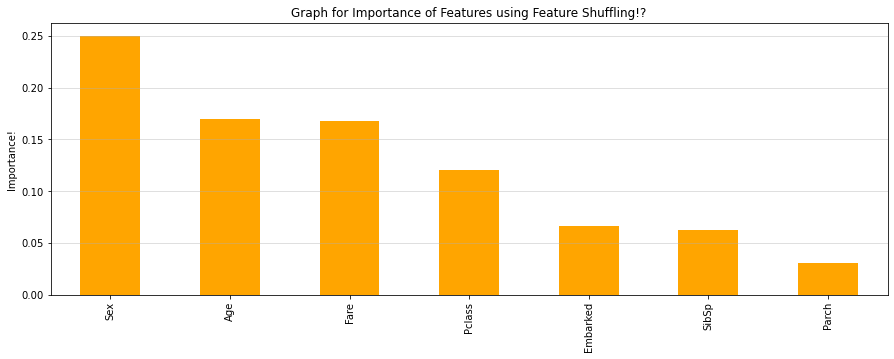

In [52]:
Feature_Importance.sort_values(ascending = False).plot.bar(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", alpha = 0.5, animated = True)
plt.ylabel("Importance!")
plt.title("Graph for Importance of Features using Feature Shuffling!?")
plt.show()

***It is clear from the Bar Graph which Feature is having how much importance, depending on the requirement, Features can be added or removed!***

# Congratulations, you have learned a new way of Selecting Features!